<a href="https://colab.research.google.com/github/LPValente/TensorFlow2.0/blob/main/TF2_0_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow
!pip install -q tensorflow-gpu==2.0.0-betal
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-betal (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-betal
2.12.0


In [ ]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print("X_train.shape:",X_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
X_train.shape: (60000, 28, 28)


In [ ]:
# the data is only 2D!
# convolution expects height x width x color
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(60000, 28, 28, 1)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides = 2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides = 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 20s 4ms/step - loss: 0.5171 - accuracy: 0.8105 - val_loss: 0.3966 - val_accuracy: 0.8532
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3568 - accuracy: 0.8664 - val_loss: 0.3303 - val_accuracy: 0.8770
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3073 - accuracy: 0.8842 - val_loss: 0.3288 - val_accuracy: 0.8804
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2752 - accuracy: 0.8968 - val_loss: 0.3031 - val_accuracy: 0.8896
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2494 - accuracy: 0.9065 - val_loss: 0.3016 - val_accuracy: 0.8874
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2287 - accuracy: 0.9137 - val_loss: 0.2888 - val_accuracy: 0.8959
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2124 - accuracy: 0.9193 - val_loss: 0.2820 - val_accuracy

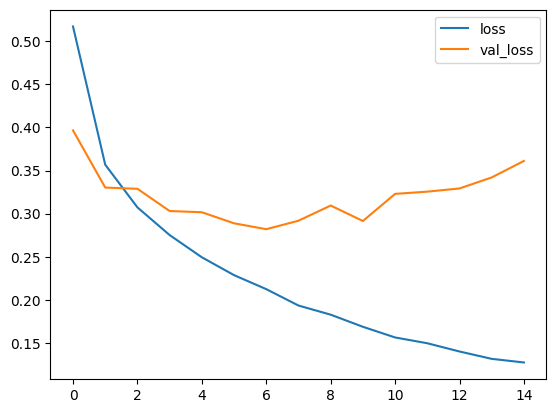

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

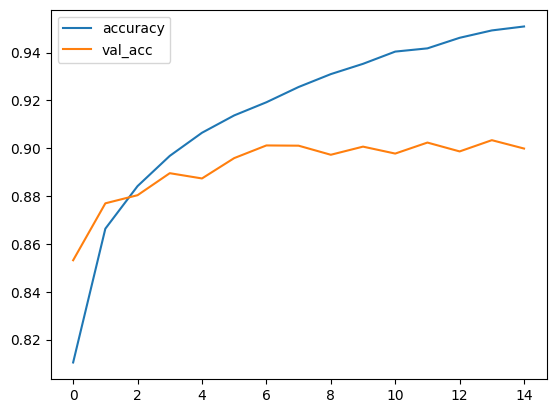

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 4ms/step
Confusion matrix, without normalization
[[877   2  33  14   4   1  66   0   3   0]
 [  3 977   2  12   4   0   1   0   1   0]
 [ 19   1 911   9  28   0  31   0   1   0]
 [ 16  10  21 892  39   0  21   0   1   0]
 [  2   0 107  23 808   0  60   0   0   0]
 [  0   0   0   2   0 959   0  22   0  17]
 [125   1 101  20  81   0 667   0   5   0]
 [  0   0   0   0   0   5   0 967   1  27]
 [  2   1   6   3   1   2   5   3 976   1]
 [  1   0   0   0   0   4   0  30   0 965]]


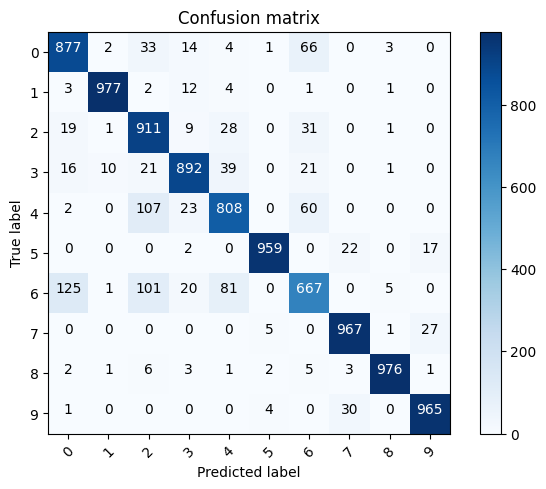

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

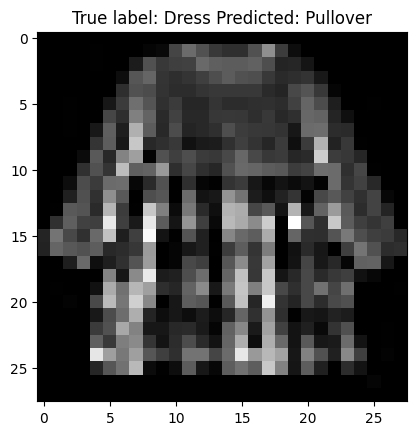

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));